In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns


## Load Data

In [2]:
path = "../data/de_train.parquet"
train_df = pd.read_parquet(path,engine="pyarrow")
train_df.head()

,cell_type,sm_name,sm_lincs_id,SMILES,control,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
0,NK cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.104720,-0.077524,-1.625596,-0.144545,0.143555,...,-0.227781,-0.010752,-0.023881,0.674536,-0.453068,0.005164,-0.094959,0.034127,0.221377,0.368755
1,T cells CD4+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.915953,-0.884380,0.371834,-0.081677,-0.498266,...,-0.494985,-0.303419,0.304955,-0.333905,-0.315516,-0.369626,-0.095079,0.704780,1.096702,-0.869887
2,T cells CD8+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,-0.387721,-0.305378,0.567777,0.303895,-0.022653,...,-0.119422,-0.033608,-0.153123,0.183597,-0.555678,-1.494789,-0.213550,0.415768,0.078439,-0.259365
3,T regulatory cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.232893,0.129029,0.336897,0.486946,0.767661,...,0.451679,0.704643,0.015468,-0.103868,0.865027,0.189114,0.224700,-0.048233,0.216139,-0.085024
4,NK cells,Mometasone Furoate,LSM-3349,C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,False,4.290652,-0.063864,-0.017443,-0.541154,0.570982,...,0.758474,0.510762,0.607401,-0.123059,0.214366,0.487838,-0.819775,0.112365,-0.122193,0.676629


<AxesSubplot: xlabel='Count', ylabel='cell_type'>

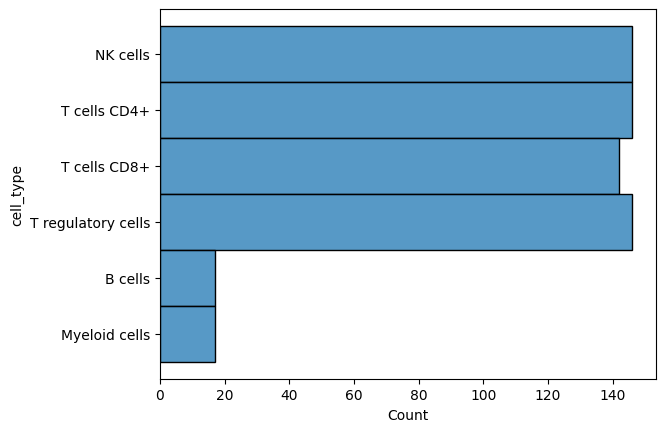

In [4]:
sns.histplot(data=train_df, y="cell_type")

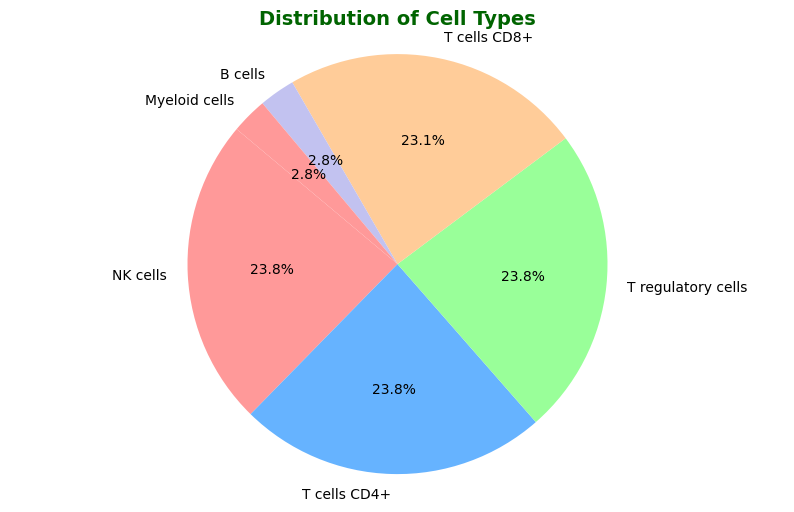

In [34]:
# Count the occurrences of each cell type
cell_type_counts = train_df['cell_type'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(cell_type_counts, labels=cell_type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title('Distribution of Cell Types', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.savefig('Distribution of Cell Types.png')
plt.show()


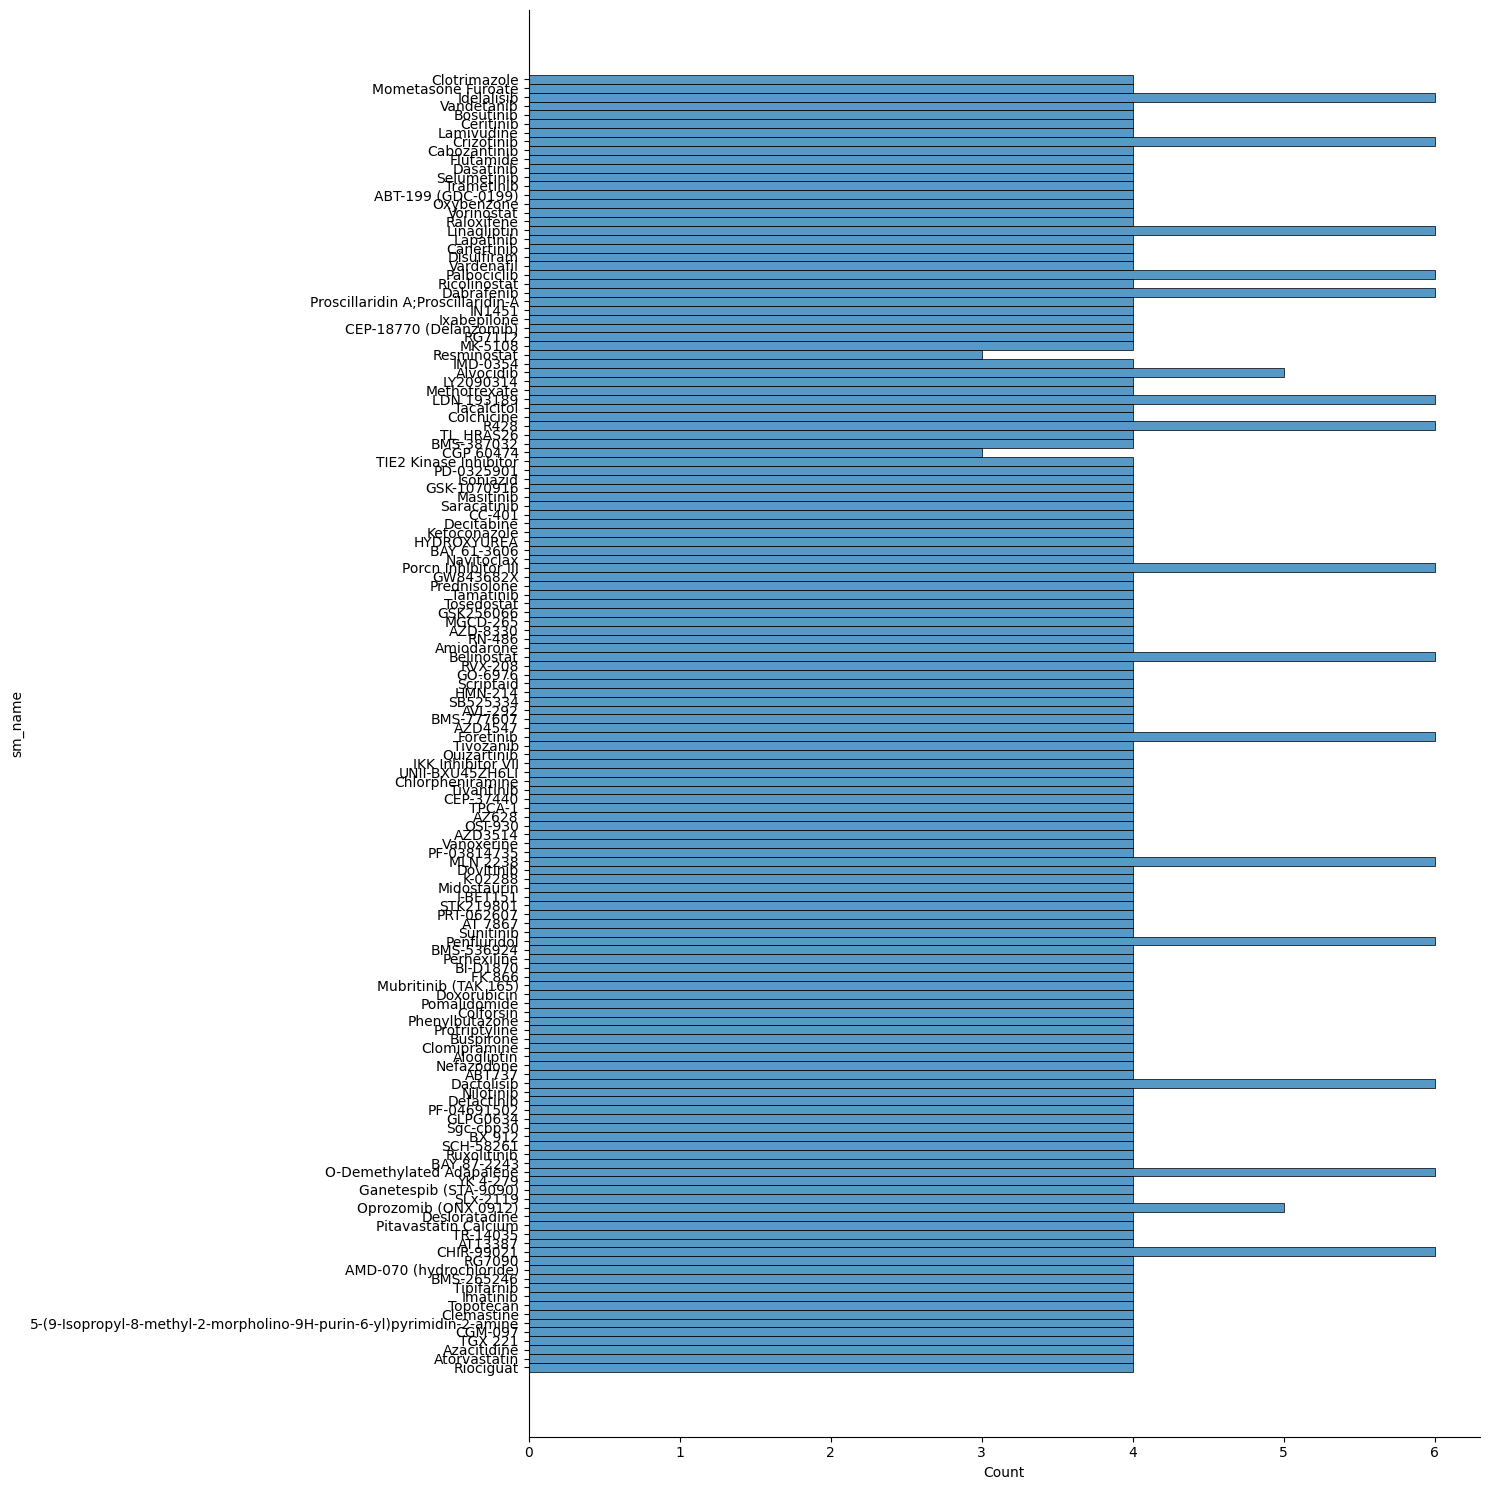

In [11]:
plt.figure(figsize=(15, 15))
sns.histplot(data=train_df, y="sm_name")
sns.despine()
plt.tight_layout()
plt.show()
plt.close()    

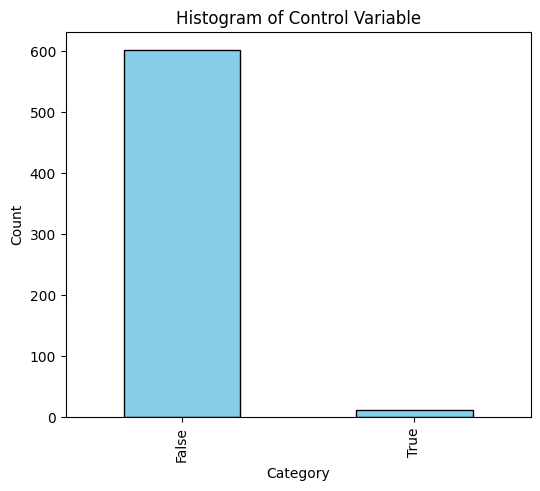

In [14]:
plt.figure(figsize=(6, 5))

# Count occurrences of each category
category_counts = train_df['control'].value_counts()

# Plot histogram
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Histogram of Control Variable')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()
plt.close()


In [19]:
train_df.columns

Index(['cell_type', 'sm_name', 'sm_lincs_id', 'SMILES', 'control', 'A1BG',
       'A1BG-AS1', 'A2M', 'A2M-AS1', 'A2MP1',
       ...
       'ZUP1', 'ZW10', 'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11B',
       'ZYX', 'ZZEF1'],
      dtype='object', length=18216)

In [25]:
train_df['sm_lincs_id'].unique()

array(['LSM-5341', 'LSM-3349', 'LSM-1205', 'LSM-1199', 'LSM-1190',
       'LSM-36374', 'LSM-5215', 'LSM-1027', 'LSM-1195', 'LSM-2621',
       'LSM-1020', 'LSM-1056', 'LSM-1143', 'LSM-45468', 'LSM-3309',
       'LSM-3828', 'LSM-3425', 'LSM-45916', 'LSM-1051', 'LSM-1120',
       'LSM-5467', 'LSM-2292', 'LSM-1071', 'LSM-6324', 'LSM-6303',
       'LSM-1476;LSM-5290', 'LSM-4349', 'LSM-43293', 'LSM-45410',
       'LSM-47459', 'LSM-36812', 'LSM-45663', 'LSM-3667', 'LSM-1011',
       'LSM-45915', 'LSM-5690', 'LSM-1115', 'LSM-45518', 'LSM-5199',
       'LSM-45574', 'LSM-2013', 'LSM-1132', 'LSM-1025', 'LSM-1194',
       'LSM-1101', 'LSM-46042', 'LSM-1062', 'LSM-1130', 'LSM-1032',
       'LSM-1186', 'LSM-5855', 'LSM-5430', 'LSM-45988', 'LSM-1167',
       'LSM-4738', 'LSM-47425', 'LSM-1014', 'LSM-24954', 'LSM-1040',
       'LSM-6286', 'LSM-45984', 'LSM-1124', 'LSM-1165', 'LSM-47132',
       'LSM-2379', 'LSM-43181', 'LSM-45724', 'LSM-1211', 'LSM-2499',
       'LSM-42802', 'LSM-1121', 'LSM-45948', '

In [29]:
train_df.shape

(614, 18216)

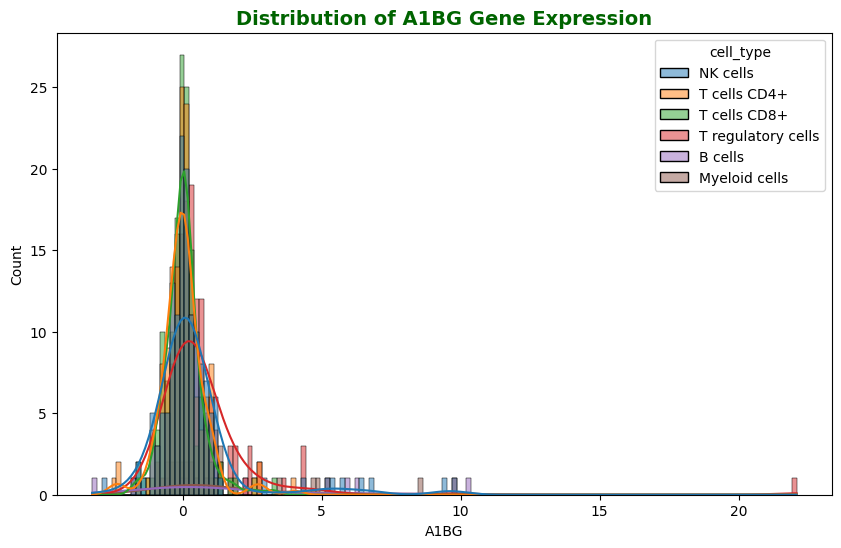

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='A1BG', hue='cell_type', kde=True)
plt.title('Distribution of A1BG Gene Expression', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.savefig('Distribution of A1BG Gene Expression.png')
plt.show()

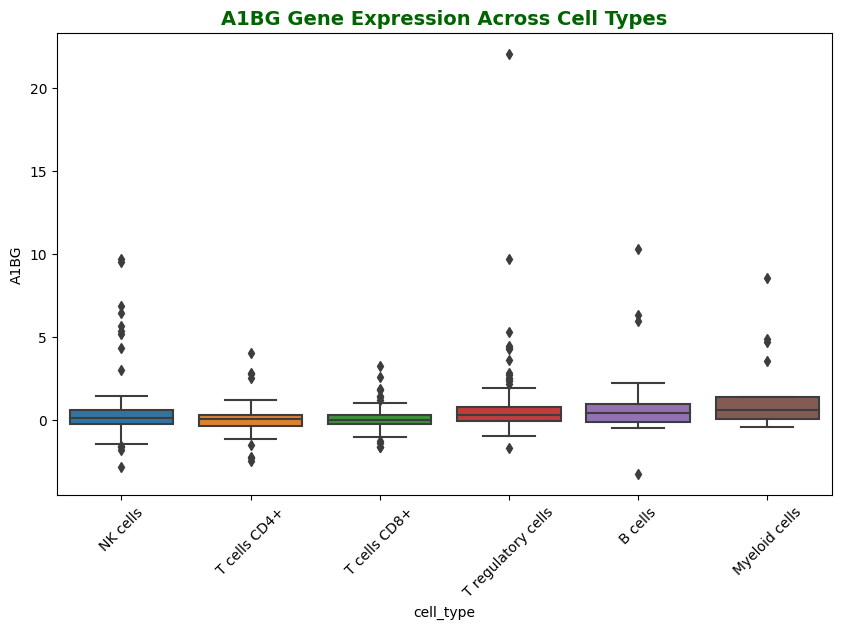

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cell_type', y='A1BG', data=train_df)
plt.title('A1BG Gene Expression Across Cell Types', 
          fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.xticks(rotation=45)
plt.savefig('A1BG Gene Expression Across Cell Types.png')
plt.show()

/Users/yvesgreatti/venv/general_39/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 800x600 with 0 Axes>

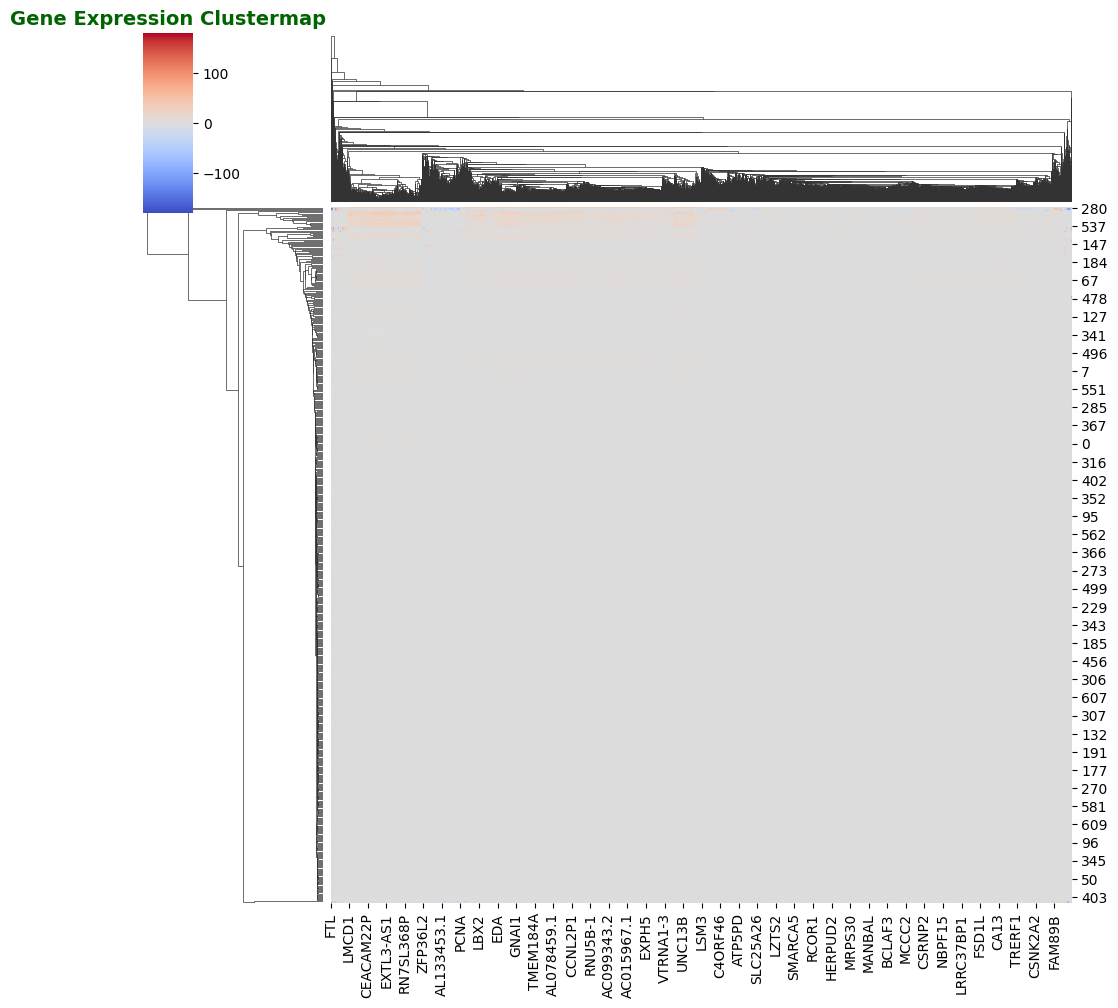

In [33]:
plt.figure(figsize=(8, 6))
sns.clustermap(train_df.drop(['cell_type', 'sm_name', 'sm_lincs_id', 'SMILES', 'control'], axis=1), cmap='coolwarm')
plt.title('Gene Expression Clustermap', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.savefig('Gene Expression Clustermap.png')
plt.show()

In [35]:
train_df.columns

Index(['cell_type', 'sm_name', 'sm_lincs_id', 'SMILES', 'control', 'A1BG',
       'A1BG-AS1', 'A2M', 'A2M-AS1', 'A2MP1',
       ...
       'ZUP1', 'ZW10', 'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11B',
       'ZYX', 'ZZEF1'],
      dtype='object', length=18216)